In [1]:
#coding:utf-8
%matplotlib inline
#上面语句：使图片内嵌交互环境显示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

In [2]:
# 科学计算用
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

# 第八章 绘图和可视化

## 使用matplotlib API

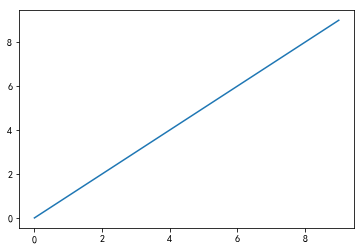

In [3]:
plt.plot(np.arange(10))

## Figure 和 Subplot

In [4]:
fig = plt.figure()

In [5]:
# 不能通过空Figure绘图，必须用add_subplot创建一个或多个subplot才行
# 下面代码的意思：创建2*2的图像
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

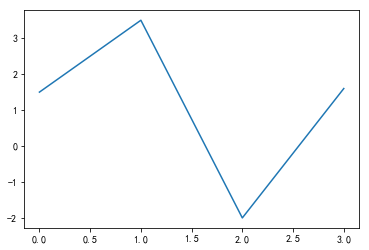

In [6]:
plt.plot([1.5,3.5,-2,1.6])

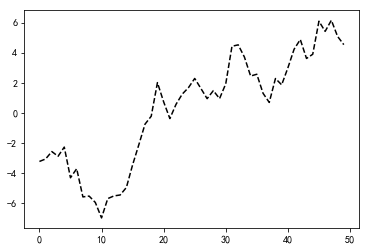

In [7]:
#“k–”是一个线型选项，用于告诉matplotlib绘制黑色虚线图。
plt.plot(np.random.randn(50).cumsum(),'k--')

In [8]:
# 上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其他空着的格子里面画图
from numpy.random import randn
_ = ax1.hist(randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))

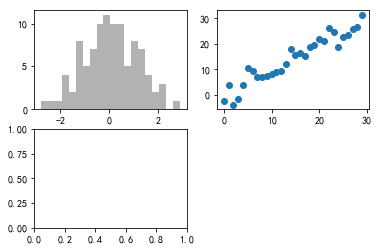

In [9]:
fig

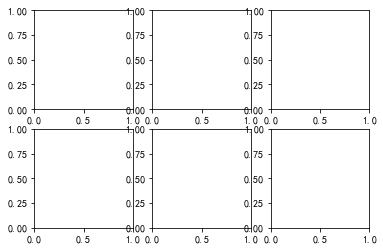

In [10]:
# plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组
fig,axes=plt.subplots(2,3)
# axes 等于是一个二维数组，例如axes[0,1]

In [11]:
%%html
<img src='pic\pyplot.subplots的选项.png' width='50%'>

### 调整subplot周围的间距

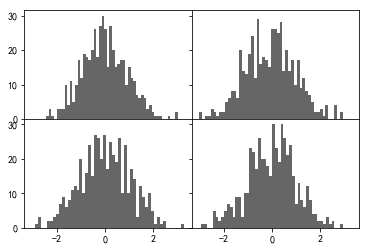

In [12]:
# Figure的subplots_adjust方法可以修改间距
#subplots_adjust(left=None,bottom=None,right=None,top=None,wpace=None,hspace=None)
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.6)

plt.subplots_adjust(wspace=0,hspace=0)

### 颜色、标记和线型

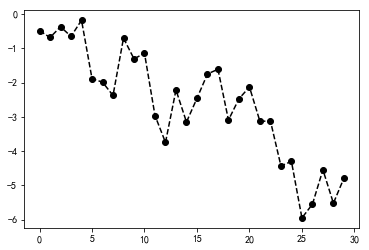

In [13]:
# ax.plot(x,y,'g--')  #根据x和y绘制绿色虚线
# ax.plot(x,y,linestyle='--',color='g')
plt.plot(randn(30).cumsum(),'ko--')

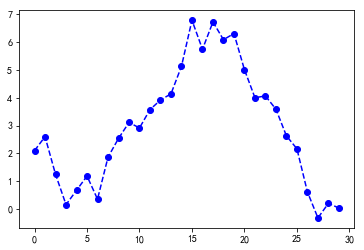

In [14]:
# 写全属性：
plt.plot(randn(30).cumsum(),color='b',linestyle='dashed',marker='o')

In [15]:
data = randn(30).cumsum()

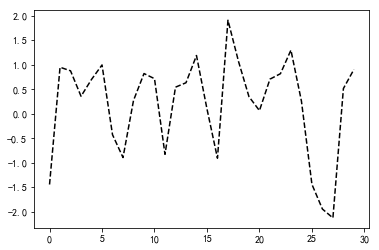

In [16]:
plt.plot(data,'k--',label='Default')

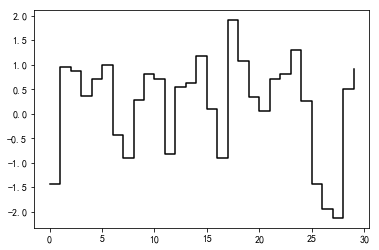

In [17]:
# 在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改
plt.plot(data,'k-',drawstyle='steps-post',label='Default')

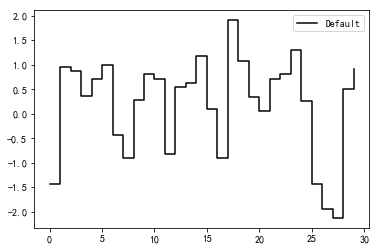

In [18]:
plt.plot(data,'k-',drawstyle='steps-post',label='Default')
plt.legend(loc='best')

### 刻度、标签和图例

设置这些有两种方法，一是面向对象的原生matplotlib API 和使用过程型pyplot接口

后续使用的都是第二种

使用方式有两种：
    - 使用时不带参数，则返回当前的参数值
    - 调用时带参数，则设置参数值

#### 设置标题、轴标签、刻度以及刻度标签

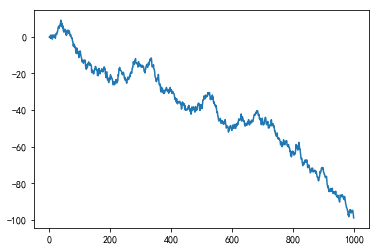

In [19]:
# 创建一个简单的图像并绘制一段随机漫步
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

In [20]:
#可以使用set_xticks和set_xticklabels修改X轴的刻度
ticks = ax.set_xticks([0,250,500,750,1000])

In [21]:
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')

In [22]:
# 用set_xlabel设置轴名称，利用set_title设置标题
ax.set_title(u'我的第一个matplotlib图')

Text(0.5,1,'我的第一个matplotlib图')

In [23]:
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

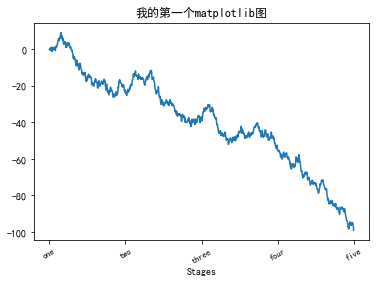

In [24]:
fig

- y轴的设置：只需要把上面的方法的x替换成y

#### 添加图例

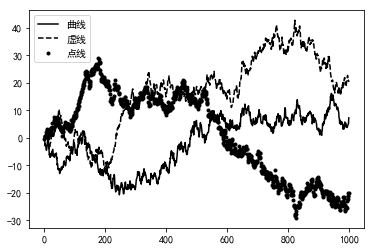

In [25]:
# 在添加subplot的时候传入label参数
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label=u'曲线')
ax.plot(randn(1000).cumsum(),'k--',label=u'虚线')
ax.plot(randn(1000).cumsum(),'k.',label=u'点线')
# 使用ax.legend()或plt.legend()自动创建图例
ax.legend(loc='best')

- loc='best'是放到最优位置的意思
- 如果从图例中去除元素，则不传入label或设置为label='_nolegend_'

### 注解以及在Subplot上绘图

注解可以是文本、箭头或其他图形等,通过text、arrow和annotate等函数进行添加。

text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：
`ax.text(x,y,"hello world!",Family='monospace',fontsize=10)`

例如，我们根据2007年以来的标准普尔500指数收盘价格（来自Yahoo!Finance）绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期。

结果如下图所示

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

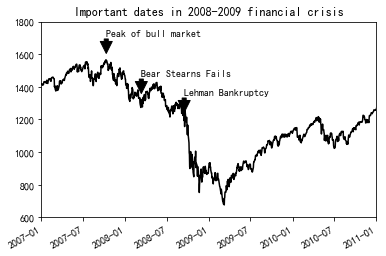

In [26]:
from datetime import datetime

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

data=pd.read_csv(r'examples\spx.csv',index_col=0,parse_dates=True)
# data返回一个DataFrame
spx=data['SPX']
# spx返回一个Series

spx.plot(ax=ax,style='k-')

crisis_data=[
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+50),
                xytext=(date,spx.asof(date)+200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left',verticalalignment='top')

# 放大到2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中

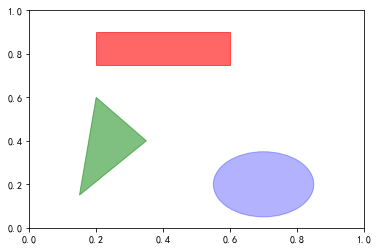

In [27]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

rect=plt.Rectangle((0.2,0.75),0.4,0.15,color='r',alpha=0.6)
circ=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件

In [28]:
# 利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig
fig.savefig(r'pic\plt\figpath.svg')

In [29]:
# 有两个选项：dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）
fig.savefig(r'pic\plt\figpath2.svg',dpi=400,bbox_inches='tight')

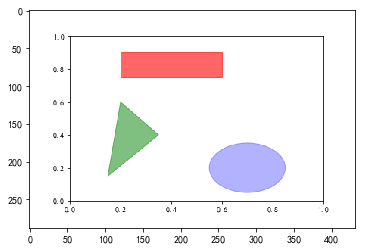

In [30]:
# savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO。其中，这个在Web上提供动态生成的图片是很实用
from io import BytesIO
buffer = BytesIO()
fig.savefig(buffer,format='png')
buffer.seek(0)
imgplt = plt.imshow(plt.imread(buffer))
buffer.close()

In [31]:
%%html
<img src='pic\Figure.savefig的选项.png' width=50%>

### matplotlib配置

- matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息，可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。

- 操作matplotlib配置系统的方式主要有两种。

- 第一种是Python编程方式，即利用rc方法
    - `plt.rc('figure',figsize=(10,10)) #将全局的图像默认大小设置为10×10`

- rc的第一个参数是希望自定义的对象，如’figure’、’axes’、’xtick’、’ytick’、’grid’、’legend’等。
- 其后可以跟上一系列的关键字参数。最简单的办法是将这些选项写成一个字典
    - ` font_opinions={'family':'monospace','weight':'bold','size':'samll'}`
    - `plt.rc('font',**font_options)`

## pandas中的绘图函数

- pandas在线文档将会是最好的绘图函数学习资源。

### 线型图

- Series和DataFrame都有一个用于生成各类图标的plot方法
- Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。 
- X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim

In [32]:
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s

0    -1.976555
10   -2.666991
20   -2.297475
30   -2.060069
40   -2.627717
50   -2.363963
60   -2.447711
70   -5.137780
80   -4.754803
90   -5.982141
dtype: float64

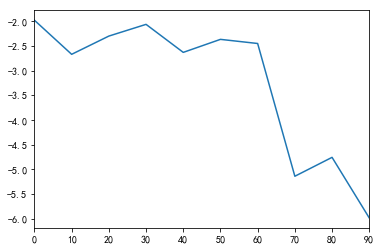

In [33]:
s.plot()

In [34]:
%%html
<img src='pic\Series.plot方法的函数.png' width=50%>

In [35]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A','B','C','D'],
              index=np.arange(0,100,10))
df

,A,B,C,D
0,-0.861754,-0.528450,-0.577970,0.001159
10,-1.655879,-0.306449,-0.179427,-1.513735
20,-0.905293,1.051246,-0.928352,-1.772709
30,0.108522,2.729618,-0.700573,-0.682837
40,-0.632467,1.513285,-0.258558,-0.022746
50,0.679907,0.448671,-0.186327,0.648663
60,-0.382494,0.755085,0.840457,0.776347
70,-0.960195,1.383432,1.625299,1.472959
80,0.289066,1.226079,2.200382,2.715169
90,0.129785,0.565208,3.316810,3.140177


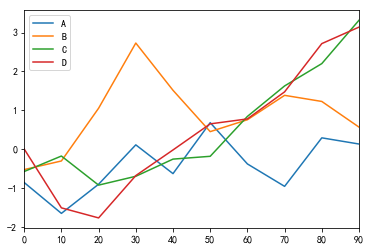

In [36]:
df.plot()

In [37]:
%%html
<img src='pic\专用于DataFrame的plot的参数.png' width=50%>

### 柱状图

- 在生成线型图的代码中加上kind=’bar’（垂直柱状图）或kind=’barh’（水平柱状图）即可生成柱状图。
- 这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度

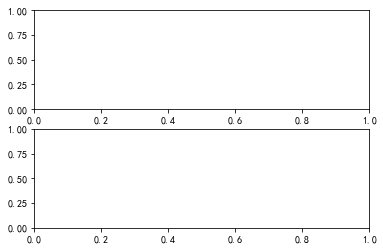

In [38]:
fig,axes = plt.subplots(2,1)

In [39]:
data = Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data

a    0.859689
b    0.893873
c    0.684701
d    0.162732
e    0.150308
f    0.334842
g    0.805685
h    0.053336
i    0.103232
j    0.888519
k    0.121313
l    0.263069
m    0.766419
n    0.481940
o    0.831077
p    0.955515
dtype: float64

In [40]:
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)

In [41]:
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

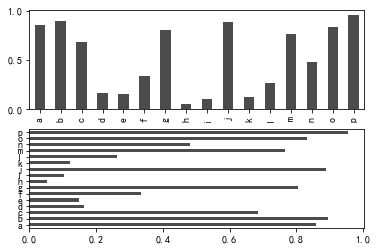

In [42]:
fig

In [43]:
# 分组
df = DataFrame(np.random.rand(6,4),
              index=['one','two','three','four','five','six'],
              columns=pd.Index(['A','B','C','D'],name=u'图例'))
df

图例,A,B,C,D
one,0.124038,0.322184,0.989269,0.402363
two,0.599204,0.856629,0.019560,0.370169
three,0.115410,0.376151,0.046121,0.254381
four,0.407772,0.457356,0.509394,0.672939
five,0.385971,0.857536,0.630466,0.987561
six,0.319032,0.358530,0.549165,0.825674


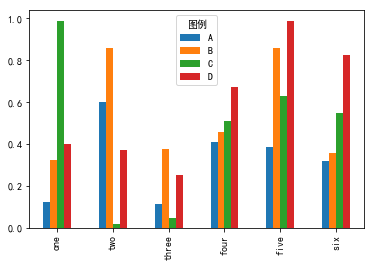

In [44]:
df.plot(kind='bar')

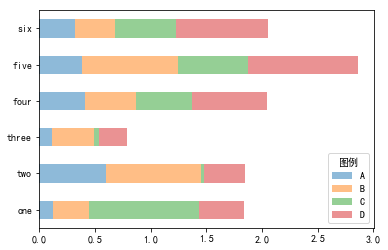

In [45]:
# 堆积：stacked=True
df.plot(kind='barh',stacked=True,alpha=0.5)

- 例子：tips数据表示小费表格，其中有金额、聚会人数信息等

In [46]:
tips = pd.read_csv(r'examples\tips.csv')
tips[:5]

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [47]:
party_counts = pd.crosstab(tips['day'],tips['size']) #不能直接使用tips.size，因为size是内置函数
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [48]:
# 1个人，6个人的聚会比较少，剔除
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [49]:
# 规格化：各行的和为1
party_pcts = party_counts.div(party_counts.sum(1),axis=0) 
# sum：参数为1的时候，按行合计
# div：类似执行除法
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


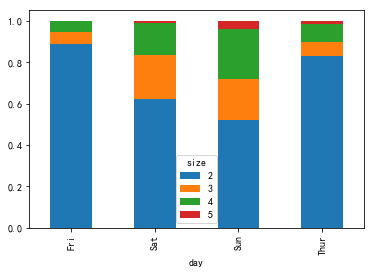

In [50]:
party_pcts.plot(kind='bar',stacked=True)

### 直方图和密度图

- 直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。
- 数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量

In [51]:
# 小费占消费总额的百分比
tips['tip_pct'] = tips['tip'] / tips['total_bill']

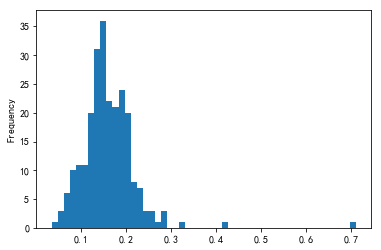

In [52]:
# 直方图
# tips['tip_pct'].hist(bins=50)这种写法和下面这种写法结果一致
tips['tip_pct'].plot(kind='hist',bins=50)

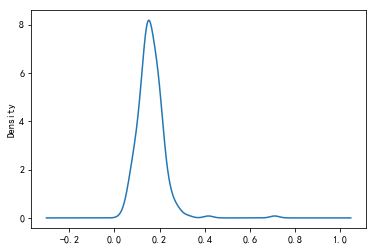

In [53]:
# 密度图：通过计算“可能会产生观测数据的连续概率分布的估计”而产生的
tips['tip_pct'].plot(kind='kde')

In [54]:
# 组合
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = Series(np.concatenate([comp1,comp2]))

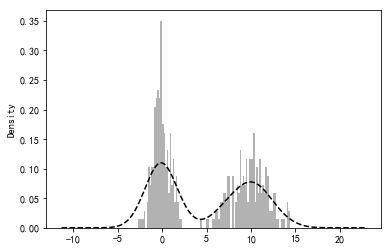

In [55]:
values.plot(kind='hist',bins=100,alpha=0.3,color='k',normed=True)
values.plot(kind='kde',style='k--')

### 散布图

In [59]:
# 散布图（scatter plot）是观察两个一维数据序列之间的关系的有效手段
macro = pd.read_csv(r'ch08\macrodata.csv')
macro[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [60]:
data = macro[['cpi','m1','tbilrate','unemp']]

In [61]:
# 对数运算
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'log(m1) 与 log(unemp) 之间的变动关系')

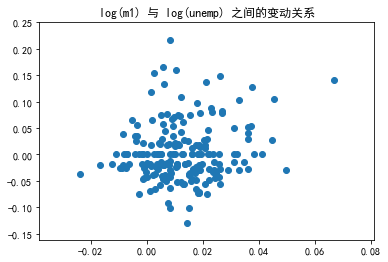

In [62]:
# 绘制散布图
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title(u'log(%s) 与 log(%s) 之间的变动关系'%('m1','unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A1538A588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022A156CDF28>]], dtype=object)

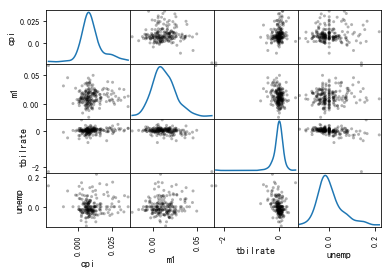

In [64]:
# 可以一次性绘制多个值之间的散布图
pd.plotting.scatter_matrix(trans_data,diagonal='kde',color='k',alpha=0.3)